In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_general = pd.read_csv('online_retail.csv')

In [5]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Agregar columna de 'totalPrice'
df_general['totalPrice'] = df_general['Quantity'] * df_general['UnitPrice']

In [7]:
# Sustituir los valores nulos en 'CustomerID' por el valor de 'InvoiceNo' en la misma fila + 'A'
df_general['CustomerID'] = df_general['CustomerID'].fillna(df_general['InvoiceNo'] + 'A')

In [8]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
 8   totalPrice   541909 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [9]:
# Agrupa los registros por 'CostumerID' y muestra los 20 clientes que mas gastaron
df_general = df_general.groupby('CustomerID').agg({'totalPrice': 'sum'}).reset_index()
df_general = df_general.sort_values(by='totalPrice', ascending=False).head(20)

In [10]:
df_general.head()

,CustomerID,totalPrice
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45


In [11]:
df = pd.read_csv('online_retail.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Resumen 
1. Se analizaron los nulos de CustomerID para entender el comportamientos de estos datos. 
2. Hay una imposibilidad de determinar los datos devueltos con su espejo positivo, dado que al no tener ID no se determina cual es..
3. Los datos de invoceNo es el mismo independientemente de cuantas veces se repite por los diferentes productos
4. InoviceNo = Misma compra = Mismo ID? (Se supone que el mismo InvoiceNo le pertence al mismo ID)
5. Se procede a sustituir el CustomerID nulos con el valor de su InvoiceNo y se le añade una 'A' para poder identificarlo en el dataframe general. 
6. Se pierde la posibilidad de darle seguimiento a los producto, dado que los invoiceNo en este caso son diferente, pero esto representa el 0,2% de datos total. 
7. Se procede a analizar los datos ya completados. 

In [13]:
#Dime cuales son los CustomerID que más han comprado
df_customer_count = df['CustomerID'].value_counts().reset_index()
df_customer_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   count       4372 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 68.4 KB


In [14]:
#Cuentame cuantas Quantity  han comprado cada CustomerID
df_quantity_count = df.groupby('CustomerID')['Quantity'].sum().reset_index()
df_quantity_count = df_quantity_count.sort_values(by='Quantity', ascending=False).head(20)  

In [15]:
df_quantity_count.head()

,CustomerID,Quantity
1703,14646.0,196719
55,12415.0,77242
1895,14911.0,77180
3758,17450.0,69029
4233,18102.0,64122


In [16]:
#Cuantas Quantity hay en total
total_quantity = df['Quantity'].sum()
print(f'Total Quantity: {total_quantity}')

Total Quantity: 5176450


## Resumen parte2
1. Existe 5.176.450 compras realizadas en total. 
2. El cliente cuyo CustomerID '14646' realizo la mayor cantidad de compras de productos con un total de 196.719 
3. El cliente 

In [17]:
# Transformar los datos de la columna 'InvoiceDate' a tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Transformar los datos de la columna 'CustomerID' a tipo string
df['CustomerID'] = df['CustomerID'].astype(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [19]:
# Agregar columna de totalPrice
df['totalPrice'] = df['Quantity'] * df['UnitPrice']


In [20]:
# Mostrar los 20 clientes que más han gastado en orden descendente
df_top_customers = df.groupby('CustomerID').agg({'totalPrice': 'sum'}).reset_index()
df_top_customers = df_top_customers.sort_values(by='totalPrice', ascending=False).head(20)


In [21]:
df_top_customers.head(20)

,CustomerID,totalPrice
4372,nan,1447682.12
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   totalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


### Desde 0

In [23]:
df0=pd.read_csv('online_retail.csv')

In [24]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [25]:
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Agregar columna de total, cambiar formato de datos

In [26]:
# agregar columna de 'totalPrice'
df0['totalPrice'] = df0['Quantity'] * df0['UnitPrice']

In [27]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   totalPrice   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [28]:
# Cambiar el tipo de dato de 'CustomerID' a int
df0['CustomerID'] = df0['CustomerID'].fillna(0).astype(int)

In [29]:
# cambiar el tipo de dato de 'CustomerID' a string
df0['CustomerID'] = df0['CustomerID'].astype(str)

In [30]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
 8   totalPrice   541909 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [31]:
# cambiar formato de 'InvoiceDate' a datetime
df0['InvoiceDate'] = pd.to_datetime(df0['InvoiceDate'])

In [32]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   totalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


### Sustituir los valores 0 en Customer ID por el numero de Invoice

In [33]:
# Sustituir los valores '0' en 'CustomerID' por el valor de 'InvoiceNo'
df0['CustomerID'] = df0.apply(
    lambda row: row['InvoiceNo'] if row['CustomerID'] == '0' else row['CustomerID'],
    axis=1
)

In [34]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   totalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [35]:
# Exportar df0 a un archivo CSV
df0.to_csv('online_retail_cleaned.csv', index=False)

## Preunta 1.-  20 que mas compraron

In [36]:
# Visualizar el total gastado por los 20 clientes que más han gastado en orden descendente
df_top_customers = df0.groupby('CustomerID').agg({'totalPrice': 'sum'}).reset_index()
df_top_customers = df_top_customers.sort_values(by='totalPrice', ascending=False).head(20)
df_top_customers.head(20)

,CustomerID,totalPrice
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187482.17
1895,14911,132572.62
55,12415,123725.45
1345,14156,113384.14
3801,17511,88125.38
3202,16684,65892.08
1005,13694,62653.10
2192,15311,59419.34


In [37]:
#Dime la media de 'totalPrice' del 'CustomerID' que es 14646
media_totalPrice_14646 = df0[df0['CustomerID'] == '14646']['totalPrice'].mean()
media_totalPrice_14646= round(media_totalPrice_14646, 2)
print(f'Media totalPrice del CustomerID 14646: {media_totalPrice_14646}')

Media totalPrice del CustomerID 14646: 134.05


In [55]:
#Dime el promedio de 'totalPrice' del 'CustomerID' que es 14646
promedio_totalPrice_14646 = df0[df0['CustomerID'] == '14646']['totalPrice'].mean()
promedio_totalPrice_14646 = round(promedio_totalPrice_14646, 2)     
print(f'Promedio totalPrice del CustomerID 14646: {promedio_totalPrice_14646}')

Promedio totalPrice del CustomerID 14646: 134.05


In [51]:
#Cual es el valor máximo de 'totalPrice' del 'CustomerID' que es 14646
max_totalPrice_14646 = df0[df0['CustomerID'] == '14646']['totalPrice'].max()
max_totalPrice_14646 = round(max_totalPrice_14646, 2)
print(f'Valor máximo totalPrice del CustomerID 14646: {max_totalPrice_14646}')

Valor máximo totalPrice del CustomerID 14646: 4992.0


In [52]:
#Sumame todos los 'totalPrice' del 'CustomerID' que es 14646
total_sum_14646 = df0[df0['CustomerID'] == '14646']['totalPrice'].sum()
total_sum_14646 = round(total_sum_14646, 2)
print(f'Suma total de totalPrice del CustomerID 14646: {total_sum_14646}')

Suma total de totalPrice del CustomerID 14646: 279489.02


In [53]:
#cual es el valor mínimo de 'totalPrice' del 'CustomerID' que es 14646
min_totalPrice_14646 = df0[df0['CustomerID'] == '14646']['totalPrice'].min()
min_totalPrice_14646 = round(min_totalPrice_14646, 2)
print(f'Valor mínimo totalPrice del CustomerID 14646: {min_totalPrice_14646}')  

Valor mínimo totalPrice del CustomerID 14646: -266.4


In [58]:
#Dime cuantos clientes son de holanda
clientes_holanda = df0[df0['Country'] == 'Netherlands']['CustomerID'].nunique()
print(f'Cantidad de clientes de Holanda: {clientes_holanda}')

Cantidad de clientes de Holanda: 9


In [59]:
#dime cuales son los 10 clientes que más han gastado en totalprice de holanda
top_10_customers_holanda = df0[df0['Country'] == 'Netherlands'].groupby('CustomerID').agg({'totalPrice': 'sum'}).reset_index()
top_10_customers_holanda = top_10_customers_holanda.sort_values(by='totalPrice', ascending=False).head(10)
print(top_10_customers_holanda)

  CustomerID  totalPrice
8      14646   279489.02
0      12759     1531.44
1      12775     1351.24
2      12778      804.23
3      12787      463.66
7      12802      412.58
5      12790      324.92
6      12791      192.60
4      12789       91.85


In [62]:
#dime cuales fueron los 'Description' que más compro el ID de cliente 14646
descriptions_14646 = df0[df0['CustomerID'] == '14646']['Description'].value_counts().reset_index()
descriptions_14646.columns = ['Description', 'Count']
top_descriptions_14646.head(10)

,Description,Count
0,SPACEBOY LUNCH BOX,25
1,ROUND SNACK BOXES SET OF4 WOODLAND,24
2,DOLLY GIRL LUNCH BOX,19
3,POSTAGE,17
4,ROUND SNACK BOXES SET OF 4 FRUITS,17
5,SPACEBOY BIRTHDAY CARD,16
6,WOODLAND CHARLOTTE BAG,15
7,JUMBO BAG RED RETROSPOT,14
8,STRAWBERRY LUNCH BOX WITH CUTLERY,14
9,GUMBALL COAT RACK,13


In [54]:
#Sumame todos los 'totalPrice' del 'CustomerID' que es 14646 negativos  
total_sum_neg_14646 = df0[(df0['CustomerID'] == '14646') & (df0['totalPrice'] < 0)]['totalPrice'].sum()
total_sum_neg_14646 = round(total_sum_neg_14646, 2)
print(f'Suma total de totalPrice negativos del CustomerID 14646: {total_sum_neg_14646}')

Suma total de totalPrice negativos del CustomerID 14646: -717.0


In [38]:
# Mostrar los 20 'CustomerID' que más productos compraron
df_top_quantity = df0.groupby('CustomerID')['Quantity'].sum().reset_index()
df_top_quantity = df_top_quantity.sort_values(by='Quantity', ascending=False).head(20)
df_top_quantity.head(20)

,CustomerID,Quantity
1703,14646,196719
55,12415,77242
1895,14911,77180
3758,17450,69029
4233,18102,64122
3801,17511,63012
1005,13694,61803
1447,14298,58021
1345,14156,57025
3202,16684,49390


In [56]:
#Dime cual es el "totalprice" del "CustomerID" que es 537632
total_price_537632 = df0[df0['CustomerID'] == '537632']['totalPrice'].sum()
total_price_537632 = round(total_price_537632, 2)
print(f'TotalPrice del CustomerID 537632: {total_price_537632}')

TotalPrice del CustomerID 537632: 13541.33


In [57]:
#Cuantas veces compro el "CustomerID" que es 537632
purchase_count_537632 = df0[df0['CustomerID'] == '537632'].shape[0]
print(f'Cantidad de compras del CustomerID 537632: {purchase_count_537632}')    

Cantidad de compras del CustomerID 537632: 1


In [39]:
# Determinar la media de gasto por cliente
mean_spending = df0.groupby('CustomerID')['totalPrice'].mean().reset_index()
mean_spending = mean_spending.sort_values(by='totalPrice', ascending=False).head(20).round(2)
mean_spending.head(20)

,CustomerID,totalPrice
4471,537632,13541.33
7897,A563185,11062.06
6510,560373,4287.63
2103,15195,3861.00
603,13135,3096.00
6993,567353,2653.95
5186,546558,2583.76
4045,17846,2033.10
3096,16532,1687.20
6524,560421,1592.49


In [40]:
df0['totalPrice'].describe().round(2)

count    541909.00
mean         17.99
std         378.81
min     -168469.60
25%           3.40
50%           9.75
75%          17.40
max      168469.60
Name: totalPrice, dtype: float64

In [41]:
#Dime todos los 

/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/2657776277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='totalPrice', data=df_top_customers, palette='viridis')


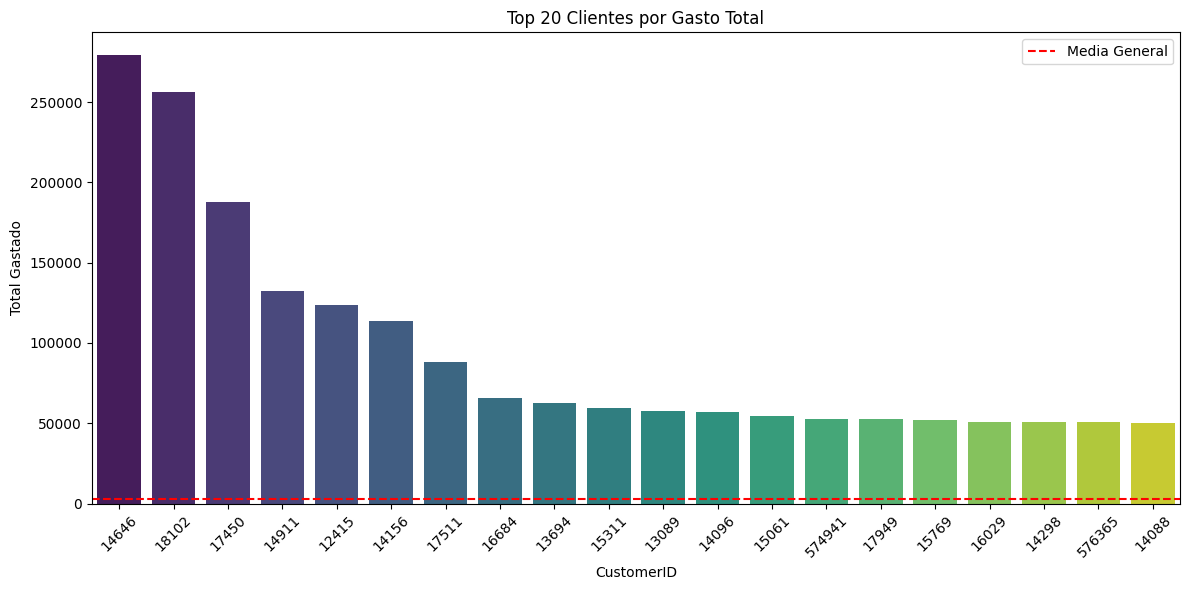

In [42]:
# Grafico de barras del total gastado por los 20 clientes que más han gastado comparado con la media general
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='totalPrice', data=df_top_customers, palette='viridis')
plt.axhline(y=mean_spending['totalPrice'].mean(), color='r', linestyle='--', label='Media General')
plt.title('Top 20 Clientes por Gasto Total')
plt.xlabel('CustomerID')
plt.ylabel('Total Gastado')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/2402100206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='totalPrice', data=df_countries, palette='viridis')


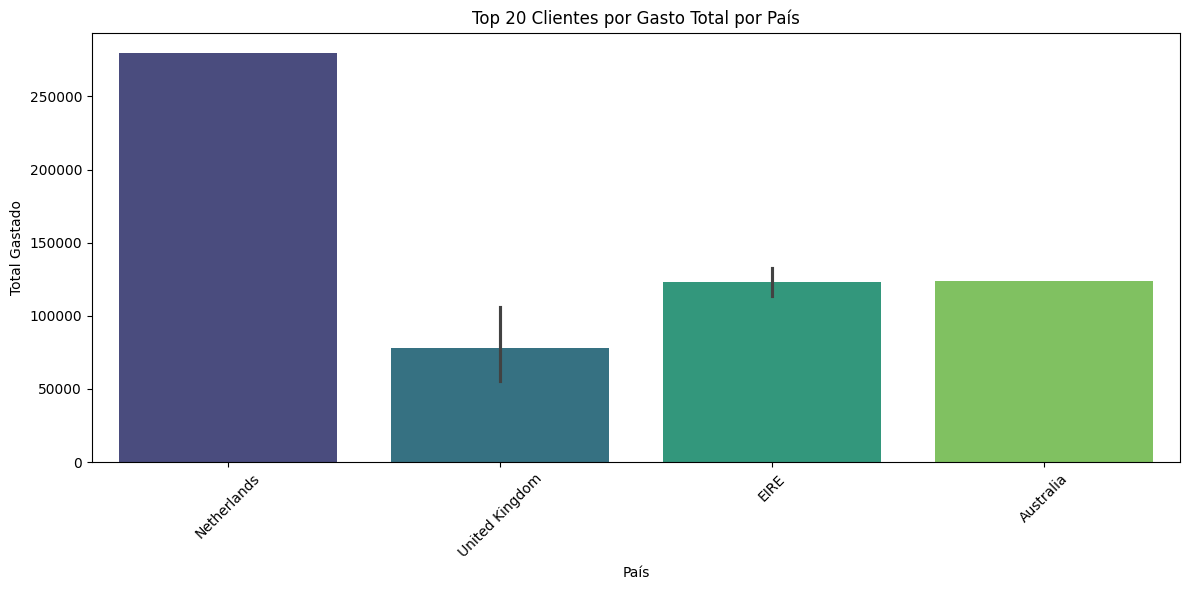

In [43]:
# De que paises son los 20 clientes que más han gastado
df_countries = df0.groupby('CustomerID').agg({'Country': 'first', 'totalPrice': 'sum'}).reset_index()
df_countries = df_countries.sort_values(by='totalPrice', ascending=False).head(20)
df_countries.head(20)
# Grafico de barras del total gastado por los 20 clientes que más han gastado por pais
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='totalPrice', data=df_countries, palette='viridis')
plt.title('Top 20 Clientes por Gasto Total por País')
plt.xlabel('País')
plt.ylabel('Total Gastado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analizar los clientes que mas compraron por pais

In [44]:
df_country = df0.groupby('Country')['CustomerID'].nunique().reset_index()
df_country = df_country.sort_values(by='CustomerID', ascending=False).head(20)
df_country.head(20)

,Country,CustomerID
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/1401607874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='CustomerID', data=df_country, palette='viridis')


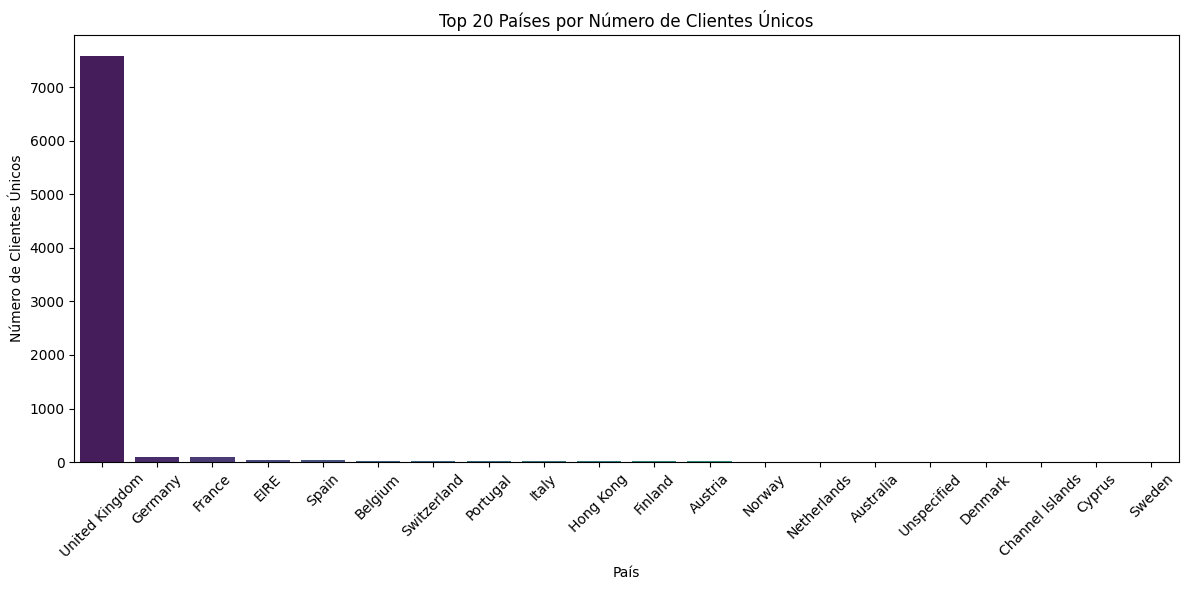

/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/1401607874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='Quantity', data=df_top_quantity, palette='viridis')


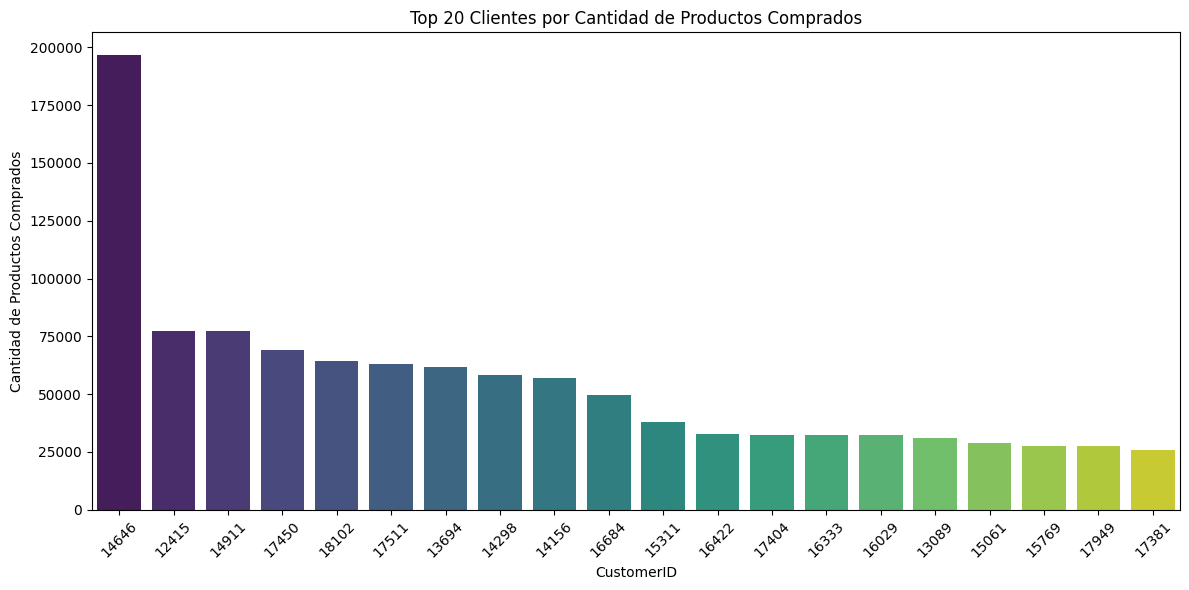

In [45]:
# Clientes que mas compraron por pais
df_country = df0.groupby('Country')['CustomerID'].nunique().reset_index()
df_country = df_country.sort_values(by='CustomerID', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='CustomerID', data=df_country, palette='viridis')
plt.title('Top 20 Países por Número de Clientes Únicos')
plt.xlabel('País')
plt.ylabel('Número de Clientes Únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Visualizar la cantidad total de productos comprados por los 20 clientes que más han comprado
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='Quantity', data=df_top_quantity, palette='viridis')
plt.title('Top 20 Clientes por Cantidad de Productos Comprados')
plt.xlabel('CustomerID')
plt.ylabel('Cantidad de Productos Comprados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/520261618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Hour'] = df_uk['InvoiceDate'].dt.hour
/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/520261618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df_uk, palette='viridis')


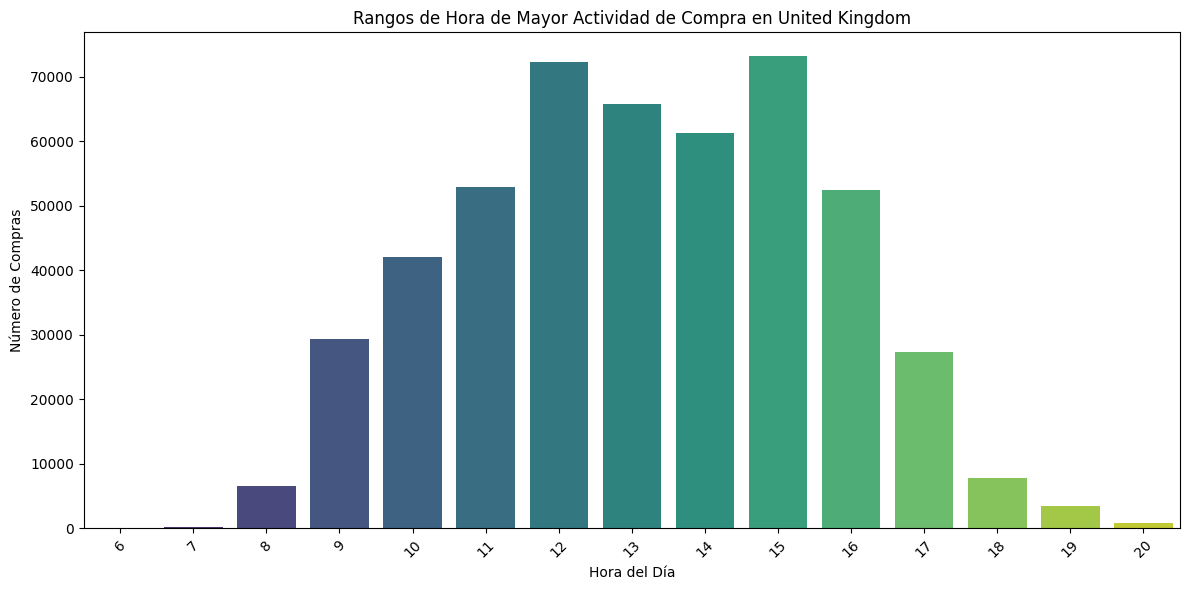

In [46]:
# Visualizar los rangos de hora en mayor actividad de compra en 'United kingdom'
df_uk = df0[df0['Country'] == 'United Kingdom']
df_uk['Hour'] = df_uk['InvoiceDate'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df_uk, palette='viridis')
plt.title('Rangos de Hora de Mayor Actividad de Compra en United Kingdom')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/3172277970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=df_uk_products, palette='viridis')


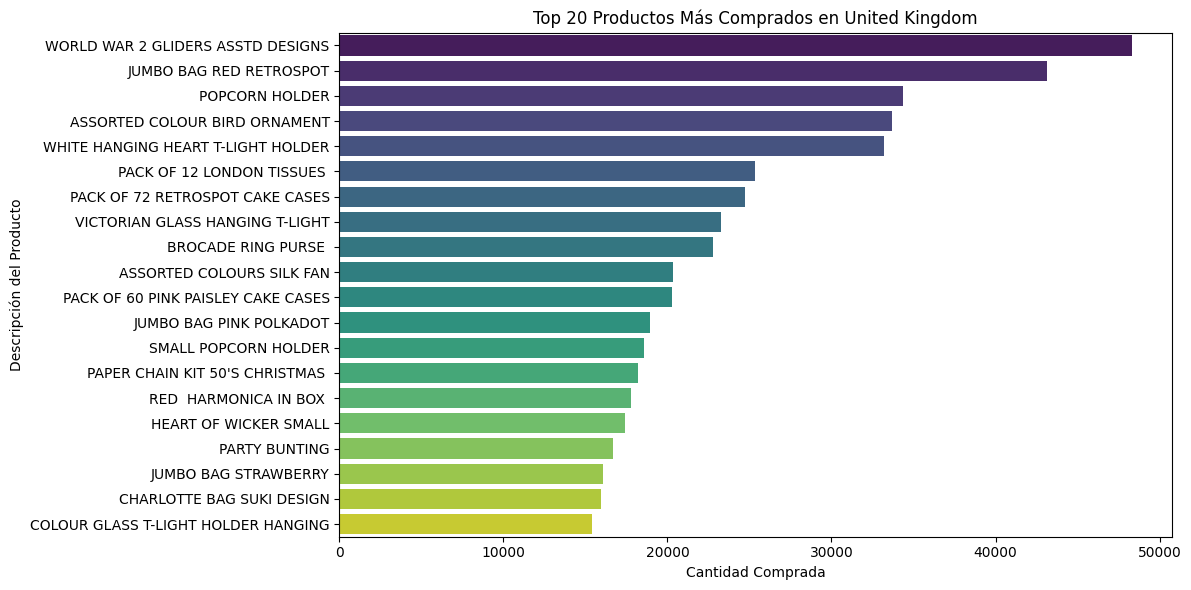

In [47]:
# Mostrar los 20 productos más comprados en United Kingdom
df_uk_products = df_uk.groupby('Description')['Quantity'].sum().reset_index()
df_uk_products = df_uk_products.sort_values(by='Quantity', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=df_uk_products, palette='viridis')
plt.title('Top 20 Productos Más Comprados en United Kingdom')
plt.xlabel('Cantidad Comprada')
plt.ylabel('Descripción del Producto')
plt.tight_layout()
plt.show()

In [48]:
# Visualizar los 20 productos mas comprados en Netherlands
df_netherlands = df0[df0['Country'] == 'Netherlands']
df_netherlands_products = df_netherlands.groupby('Description')['Quantity'].sum().reset_index()
df_netherlands_products = df_netherlands_products.sort_values(by='Quantity', ascending=False).head(20)
df_netherlands_products.head(20)

,Description,Quantity
526,RABBIT NIGHT LIGHT,4801
710,SPACEBOY LUNCH BOX,4528
176,DOLLY GIRL LUNCH BOX,4132
446,PACK OF 72 RETROSPOT CAKE CASES,4128
594,ROUND SNACK BOXES SET OF4 WOODLAND,3132
562,RED TOADSTOOL LED NIGHT LIGHT,2388
776,WOODLAND CHARLOTTE BAG,2310
546,RED RETROSPOT CHARLOTTE BAG,2100
25,5 HOOK HANGER RED MAGIC TOADSTOOL,2016
334,JUMBO BAG RED RETROSPOT,2000


/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/133274107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=df_netherlands_products, palette='viridis')


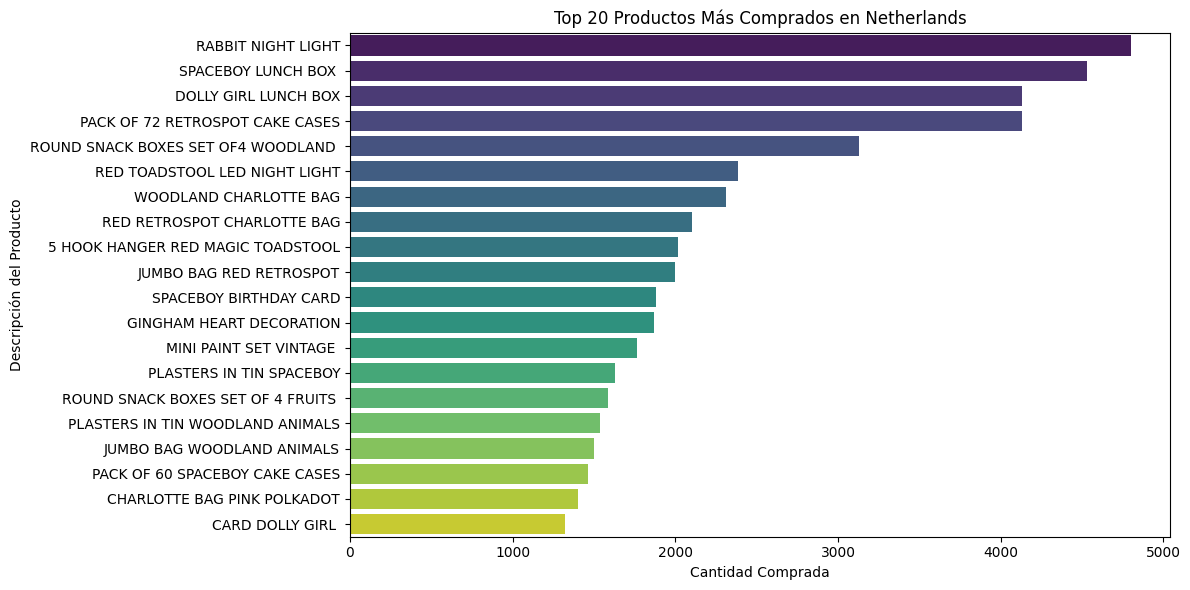

In [49]:
# Grafico de barras de los 20 productos mas comprados en Netherlands
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=df_netherlands_products, palette='viridis')
plt.title('Top 20 Productos Más Comprados en Netherlands')
plt.xlabel('Cantidad Comprada')
plt.ylabel('Descripción del Producto')
plt.tight_layout()
plt.show()

/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/4033232027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netherlands['Hour'] = df_netherlands['InvoiceDate'].dt.hour
/var/folders/q6/xvn2flf56n923rscyl3kvzpr0000gn/T/ipykernel_9373/4033232027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df_netherlands, palette='viridis')


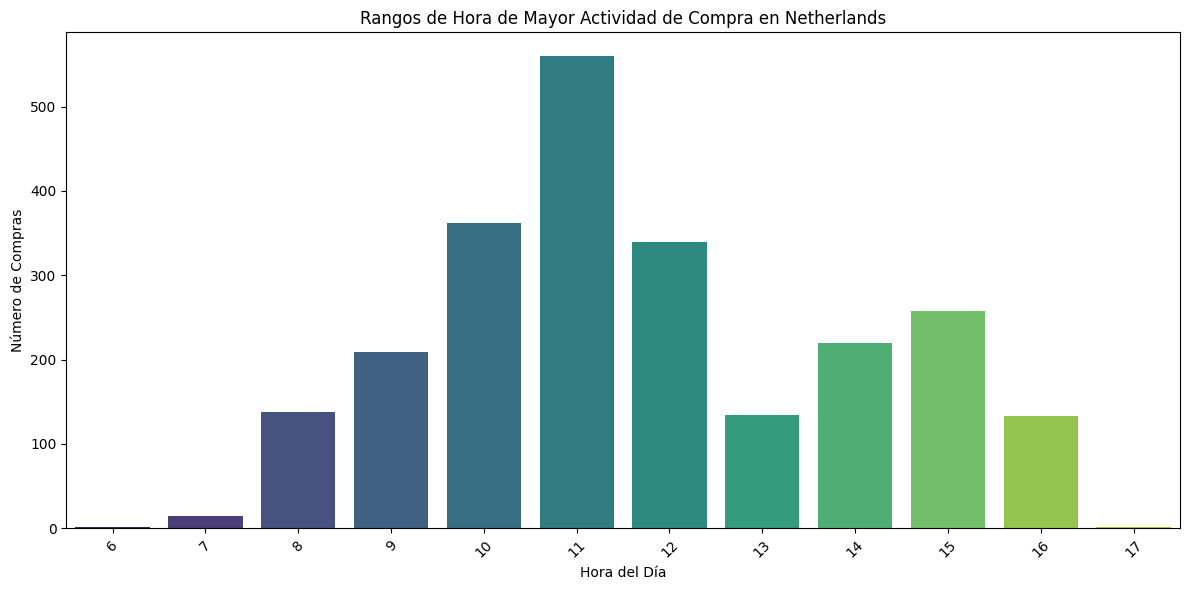

In [50]:
# Rango de horas de mayor actividad de compra en Netherlands
df_netherlands['Hour'] = df_netherlands['InvoiceDate'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df_netherlands, palette='viridis')
plt.title('Rangos de Hora de Mayor Actividad de Compra en Netherlands')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()